# Autoencoder2Sound
Synthesizes musical notes and chords sonifying the ten-dimensional latent space of a sparse autoencoder that explores the spectra of the MILES stellar library. Data: SVO.

Data download: http://svocats.cab.inta-csic.es/miles/index.php?action=search
#### ACKNOWLEDGMENT
This work is based on data from the MILES service developed by the Spanish Virtual Observatory in the framework of the IAU Comission G5 Working Group : Spectral Stellar Libraries.

In [1]:
from astropy.io import fits
import matplotlib.pylab as plt
import numpy as np

from pythonosc import udp_client
import time

import os
from fnmatch import fnmatch

from pathlib import Path

In [2]:
root = '## YOUR FOLDER PATH TO THE DOWNLOADED SPECTRA ##'
target = "miles_spec_fits_s0980.fits"

In [3]:
for path, subdirs, files in os.walk(root):
    for name in files:
        if fnmatch(name, target):
            print([os.path.join(path, name)])

['/Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0980.fits']


In [4]:
file = [os.path.join(path, name)]
str = " " 
Ffile = (str.join(file))  
route = Path(Ffile)
Fname = route.with_suffix('')

In [5]:
type (Ffile)
print (Ffile)
print (Fname)

/Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0296.fits
/Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0296


In [6]:
file[0]

'/Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0296.fits'

In [7]:
files

['miles_spec_fits_s0597.fits',
 'miles_spec_fits_s0981.fits',
 'miles_spec_fits_s0578.fits',
 'miles_spec_fits_s0082.fits',
 'miles_spec_fits_s0128.fits',
 'miles_spec_fits_s0201.fits',
 'miles_spec_fits_s0651.fits',
 'miles_spec_fits_s0344.fits',
 'miles_spec_fits_s0714.fits',
 'miles_spec_fits_s0939.fits',
 'miles_spec_fits_s0893.fits',
 'miles_spec_fits_s0190.fits',
 'miles_spec_fits_s0485.fits',
 'miles_spec_fits_s0606.fits',
 'miles_spec_fits_s0256.fits',
 'miles_spec_fits_s0743.fits',
 'miles_spec_fits_s0313.fits',
 'miles_spec_fits_s0186.fits',
 'miles_spec_fits_s0885.fits',
 'miles_spec_fits_s0539.fits',
 'miles_spec_fits_s0169.fits',
 'miles_spec_fits_s0493.fits',
 'miles_spec_fits_s0240.fits',
 'miles_spec_fits_s0610.fits',
 'miles_spec_fits_s0305.fits',
 'miles_spec_fits_s0755.fits',
 'miles_spec_fits_s0978.fits',
 'miles_spec_fits_s0581.fits',
 'miles_spec_fits_s0094.fits',
 'miles_spec_fits_s0647.fits',
 'miles_spec_fits_s0217.fits',
 'miles_spec_fits_s0702.fits',
 'miles_

In [8]:
file

['/Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0296.fits']

In [9]:
#Exploring one spectrum of the library
file = "/Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0597.fits"

sp = fits.open(file)
print('\n\nHeader of the spectrum :\n\n', sp[0].header, '\n\n')

flux2 = np.zeros(sp[0].header['NAXIS1'], dtype=float)

flux2 = np.array(sp[0].data)
flux_norm = flux2/(np.nanmax(flux2))

wave2 = np.ones(sp[0].header['NAXIS1'], dtype=float)
for i in range(sp[0].header['NAXIS1']):
    wave2[i] = sp[0].header['CRVAL1'] + i*sp[0].header['CDELT1']



Header of the spectrum :

 SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                 4367 / length of data axis 1                          NAXIS2  =                    1 / length of data axis 2                          COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H COMMENT ----------------------------------------------------------------------  COMMENT ************************** REDUCEME HEADER ***************************  COMMENT ----------------------------------------------------------------------  HISTORY Date: 06/10/**                                                          CRPIX1  =                 1.00                                                  CRVAL1  =  

In [10]:
flux_ok = np.reshape(flux_norm, (sp[0].header['NAXIS1']))

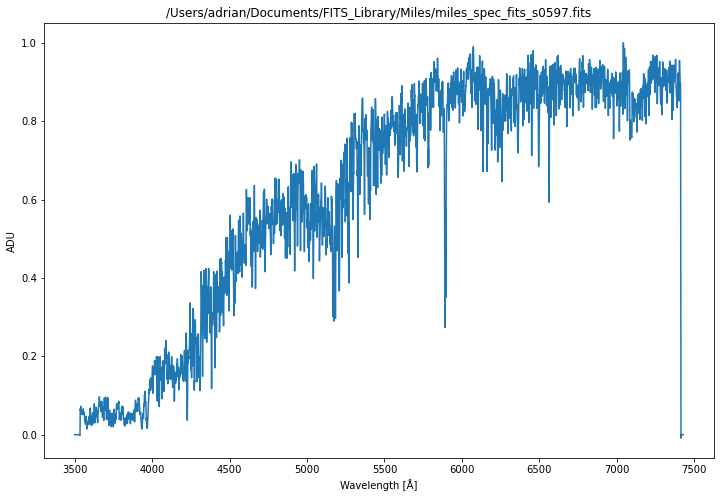

In [11]:
fig = plt.figure(1, figsize=(12, 8))
plt.plot(wave2, flux_ok)
plt.xlabel('Wavelength [Å]')
plt.ylabel('ADU')
plt.title(file)
plt.show()

## Number of files in the folder and spectrum dimensions

In [12]:
num = 1
dim1 = sp[0].header['NAXIS1']
#dim2=1

for path, subdirs, files in os.walk(root):
    for nanme in files:
        num += 1
print(num)
print(dim1)

985
4367


## Loading the library

In [13]:
#Generating the complete library dataset
curves = 0
custom_set = np.zeros((num, dim1)) #(10, 6700, 1) elements: STELIB= 256/values: 6700/dimensions: x-y
label_set = np.zeros((num, ), dtype=int)
spectra_set = [''] * num #???np.char.array((num, 1, 1)) #

for path, subdirs, files in os.walk(root):
    for name in files:
        file = [os.path.join(path, name)]
        str = " " 
        Ffile = (str.join(file))
        route = Path(name)
        Fname = route.with_suffix('')
        Fpng = route.with_suffix('.png')

        data, header = fits.getdata(Ffile, header=True)
        hdu_number = 0
        fits.getheader(Ffile, hdu_number)
        fits_file = Ffile
        
        with fits.open(fits_file, mode='readonly') as hdulist:
            hdulist.info()
            data = np.array(hdulist[0].data)
             
            data_norm = np.reshape(data/(np.nanmax(data)), (sp[0].header['NAXIS1']))

            
            label_set[curves] = curves #name. encode() #fits_file #.encode()
            spectra_set[curves] = name
            for i in range (dim1):
                custom_set[curves,i] = (data_norm[i])
        hdulist.close   
        curves += 1
            
        print ("Spectra loaded:",curves+1, "spectra");


Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0597.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 2 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0981.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 3 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0578.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 4 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0082.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 5 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits

Spectra loaded: 37 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0903.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 38 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0450.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 39 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0779.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 40 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0283.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 41 spectra
Filename: /Users/adrian/Documents/FIT

Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0061.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 73 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0431.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 74 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0124.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 75 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0574.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 76 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_

Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0372.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 108 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0688.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 109 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0667.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 110 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0237.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 111 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_s

Spectra loaded: 142 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0518.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 143 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0148.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 144 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0324.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 145 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0774.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 146 spectra
Filename: /Users/adrian/Document

Spectra loaded: 177 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0719.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 178 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0349.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 179 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0294.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 180 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0781.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 181 spectra
Filename: /Users/adrian/Document

Spectra loaded: 212 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0902.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 213 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 214 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0451.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 215 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0646.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 216 spectra
Filename: /Users/adrian/Document

Spectra loaded: 247 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0129.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 248 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0067.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 249 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0437.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 250 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0964.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 251 spectra
Filename: /Users/adrian/Document

Spectra loaded: 282 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0266.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 283 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0636.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 284 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0909.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 285 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0724.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 286 spectra
Filename: /Users/adrian/Document

Spectra loaded: 317 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0745.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 318 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0315.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 319 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0883.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 320 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0929.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 321 spectra
Filename: /Users/adrian/Document

Spectra loaded: 352 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0397.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 353 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0801.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 354 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0102.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 355 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0552.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 356 spectra
Filename: /Users/adrian/Document

Spectra loaded: 387 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0416.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 388 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0945.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 389 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0379.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 390 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0683.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 391 spectra
Filename: /Users/adrian/Document

Spectra loaded: 422 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0494.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 423 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0601.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 424 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0251.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 425 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0744.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 426 spectra
Filename: /Users/adrian/Document

Spectra loaded: 457 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0908.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 458 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0322.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 459 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0772.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 460 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0288.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 461 spectra
Filename: /Users/adrian/Document

Spectra loaded: 492 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0573.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 493 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0089.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 494 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0858.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 495 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0622.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 496 spectra
Filename: /Users/adrian/Document

Spectra loaded: 527 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0862.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 528 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0927.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 529 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0024.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 530 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0474.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 531 spectra
Filename: /Users/adrian/Document

Spectra loaded: 562 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0415.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 563 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0100.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 564 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0550.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 565 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0803.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 566 spectra
Filename: /Users/adrian/Document

Spectra loaded: 597 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0028.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 598 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0881.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 599 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0747.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 600 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0317.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 601 spectra
Filename: /Users/adrian/Document

Spectra loaded: 632 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0253.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 633 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0496.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 634 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0479.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 635 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0183.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 636 spectra
Filename: /Users/adrian/Document

Spectra loaded: 667 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0947.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 668 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0044.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 669 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0414.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 670 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0101.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 671 spectra
Filename: /Users/adrian/Document

Spectra loaded: 702 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0160.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 703 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0530.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 704 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0863.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 705 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0926.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 706 spectra
Filename: /Users/adrian/Document

Spectra loaded: 737 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0336.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 738 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0859.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 739 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0278.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 740 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0782.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 741 spectra
Filename: /Users/adrian/Document

Spectra loaded: 772 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0844.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 773 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0147.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 774 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0517.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 775 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0700.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 776 spectra
Filename: /Users/adrian/Document

Spectra loaded: 807 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0595.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 808 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0018.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 809 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0448.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 810 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0624.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 811 spectra
Filename: /Users/adrian/Document

Spectra loaded: 842 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0537.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 843 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0022.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 844 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0472.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 845 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0188.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 846 spectra
Filename: /Users/adrian/Document

Spectra loaded: 877 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0865.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 878 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0166.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 879 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0536.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 880 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0023.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 881 spectra
Filename: /Users/adrian/Document

Spectra loaded: 912 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0760.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 913 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0330.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 914 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0019.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 915 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0449.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 916 spectra
Filename: /Users/adrian/Document

Spectra loaded: 947 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0644.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 948 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0214.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 949 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 950 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0453.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 951 spectra
Filename: /Users/adrian/Document

Spectra loaded: 982 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0783.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 983 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0629.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 984 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0296.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 985 spectra


## Creating the dataset

In [14]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [15]:
label_set = np.asarray(label_set)

In [16]:
dataset = tf.data.Dataset.from_tensor_slices((custom_set, label_set))
dataset.element_spec

(TensorSpec(shape=(4367,), dtype=tf.float64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

## Splitting the custom dataset

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(custom_set,label_set,test_size=0.2,random_state=123)

## Creating the model

In [19]:
import keras.backend as K

from tensorflow import keras
from tensorflow.keras import layers

from keras.layers import Dense, Input
from keras.models import Model

In [20]:
input_shape = (dim1,)
input_shape[0]

4367

In [21]:
latent_dim = 10
intermediate_dim = int(dim1/latent_dim)

In [22]:
dim1

4367

In [23]:
intermediate_dim

436

In [24]:
from tensorflow import keras
from tensorflow.keras import layers

from keras.layers import Dense, Input
from keras.models import Model

from tensorflow.keras import layers, losses


class Autoencoder(tf.keras.Model):
  def __init__(self, latent_dim, intermediate_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.intermediate_dim = intermediate_dim

    #encoder
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      Dense(intermediate_dim, activation='sigmoid', name='intermediate_layer_1'),
      Dense(intermediate_dim, activation='sigmoid', name='intermediate_layer_2'),
      Dense(latent_dim, activation='sigmoid', name='latent_space') 
    ])
    
    #decoder
    self.decoder = tf.keras.Sequential([
      Dense(intermediate_dim, activation='sigmoid', name='intermediate_layer_3'),
      Dense(input_shape[0], activation='sigmoid', name='latent_space'),
    #  layers.Reshape((dim1,))
    ])
       
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim, intermediate_dim)

In [25]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [26]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
25/25 [==============================] - 1s 19ms/step - loss: 0.0566 - val_loss: 0.0534
Epoch 2/100
25/25 [==============================] - 0s 15ms/step - loss: 0.0515 - val_loss: 0.0519
Epoch 3/100
25/25 [==============================] - 0s 15ms/step - loss: 0.0498 - val_loss: 0.0485
Epoch 4/100
25/25 [==============================] - 0s 15ms/step - loss: 0.0459 - val_loss: 0.0431
Epoch 5/100
25/25 [==============================] - 0s 16ms/step - loss: 0.0368 - val_loss: 0.0298
Epoch 6/100
25/25 [==============================] - 0s 14ms/step - loss: 0.0271 - val_loss: 0.0231
Epoch 7/100
25/25 [==============================] - 0s 13ms/step - loss: 0.0225 - val_loss: 0.0203
Epoch 8/100
25/25 [==============================] - 0s 14ms/step - loss: 0.0207 - val_loss: 0.0203
Epoch 9/100
25/25 [==============================] - 0s 14ms/step - loss: 0.0196 - val_loss: 0.0184
Epoch 10/100
25/25 [==============================] - 0s 14ms/step - loss: 0.0187 - val_loss: 0.0177

In [27]:
autoencoder.encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 4367)              0         
_________________________________________________________________
intermediate_layer_1 (Dense) (None, 436)               1904448   
_________________________________________________________________
intermediate_layer_2 (Dense) (None, 436)               190532    
_________________________________________________________________
latent_space (Dense)         (None, 10)                4370      
Total params: 2,099,350
Trainable params: 2,099,350
Non-trainable params: 0
_________________________________________________________________


In [28]:
autoencoder.decoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
intermediate_layer_3 (Dense) (None, 436)               4796      
_________________________________________________________________
latent_space (Dense)         (None, 4367)              1908379   
Total params: 1,913,175
Trainable params: 1,913,175
Non-trainable params: 0
_________________________________________________________________


## Testing

In [29]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [30]:
encoded_imgs[0]

array([9.9002719e-03, 1.3620377e-01, 5.4497093e-02, 5.2413863e-01,
       2.5585294e-04, 1.9247985e-01, 3.0640364e-03, 9.1008866e-01,
       2.2808540e-01, 8.2749426e-03], dtype=float32)

## Comparing the original spectra(left) with the decoded spectra(right)

Text(0.5, 0, 'Decoded Spectra')

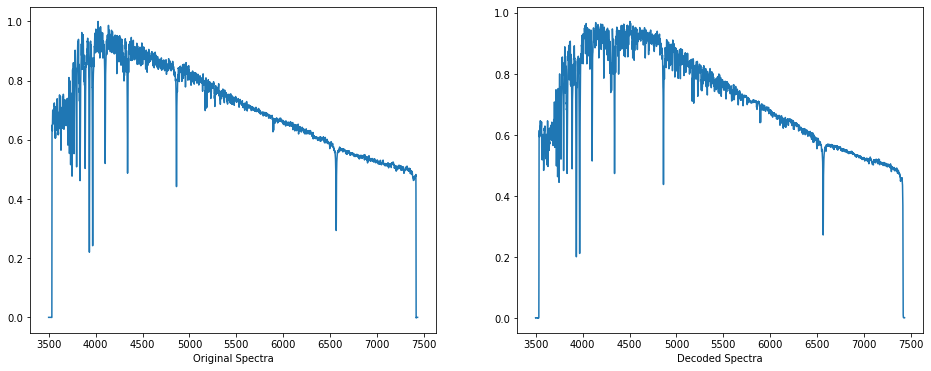

In [31]:
figure = 43
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].plot(wave2, x_test[figure])
ax[0].set_xlabel('Original Spectra')   
ax[1].plot(wave2, decoded_imgs[figure])
ax[1].set_xlabel('Decoded Spectra')

In [32]:
encoded_imgs[figure]

array([5.9689492e-02, 4.4423044e-03, 8.1058443e-03, 5.8183843e-01,
       3.1983256e-03, 9.9167323e-01, 1.6204696e-05, 9.9982643e-01,
       9.5375466e-01, 8.2485694e-01], dtype=float32)

In [33]:
np.shape(encoded_imgs)

(197, 10)

In [34]:
decoded_imgs[figure]

array([0.00207078, 0.00231692, 0.00195444, ..., 0.00279838, 0.00310567,
       0.00252813], dtype=float32)

In [35]:
np.shape(decoded_imgs)

(197, 4367)

## Saving the model

In [36]:
autoencoder.save('2layers_Miles_autoencoder.tf',save_format='tf')

INFO:tensorflow:Assets written to: 2layers_Miles_autoencoder.tf/assets


In [ ]:
import session_info
session_info.show()